In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MAP_SIZE = (32, 48)

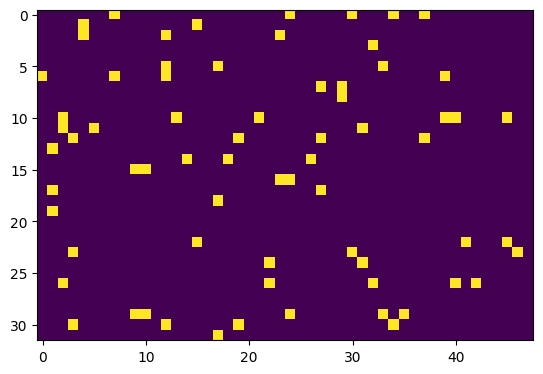

In [3]:
block_floor_id = np.random.choice([0, 1], (MAP_SIZE), p=[0.95, 0.05])
plt.imshow(block_floor_id)

In [4]:
class Square:
    def __init__(self, x=0, y=0, w=1, h=1,) -> None:
        self.x = x
        self.y = y

        self.w = w
        self.h = h

    def get_x(self, x):
        return self.x
    def get_y(self, y):
        return self.y

    def set_x(self, x):
        self.x = x
    def set_y(self, y):
        self.y = y

    def get_center(self):
        return self.x, self.y
    def get_topleft(self):
        return self.x-self.w/2, self.y-self.h/2
    def get_topright(self):
        return self.x+self.w/2, self.y-self.h/2
    def get_bottomleft(self):
        return self.x-self.w/2, self.y+self.h/2
    def get_bottomright(self):
        return self.x+self.w/2, self.y+self.h/2
    
    def set_center(self, x, y):
        self.x, self.y = x, y
    def set_topleft(self, x, y):
        self.x = x+self.w/2
        self.y = y+self.h/2
    def set_topright(self, x, y):
        self.x = x-self.w/2 
        self.y = y+self.h/2
    def set_bottomleft(self, x, y):
        self.x = x+self.w/2
        self.y = y-self.h/2
    def set_bottomright(self, x, y):
        self.x = x-self.w/2
        self.y = y-self.h/2

    
    def get_top(self): 
        return self.y-self.h/2
    def get_right(self):
        return self.x+self.w/2
    def get_bottom(self):
        return  self.y+self.h/2
    def get_left(self):
        return self.x-self.w/2
   

    def set_top(self, y): 
        self.y = y+self.h/2
    def set_right(self, x):
        self.x = x-self.w/2
    def set_bottom(self, y):
        self.y = y-self.h/2
    def set_left(self, x):
        self.x = x+self.w/2
    

    def get_all_x(self):
        return [self.get_center()[0], self.get_topleft()[0], self.get_topright()[0], self.get_bottomleft()[0], self.get_bottomright()[0]]
    def get_all_y(self):
        return [self.get_center()[1], self.get_topleft()[1], self.get_topright()[1], self.get_bottomleft()[1], self.get_bottomright()[1]]
    
    def collidesquare(self, square):
        dx = np.abs(self.get_center()[0] - square.get_center()[0])
        dy = np.abs(self.get_center()[1] - square.get_center()[1])

        # print(f'{dx} < {self.w/2} or {dx} < {square.w/2}) or ({dy} < {self.h/2} or {dy} < {square.h/2}')
        # print(dx, dy, self.w/2, np.abs(dx) < self.w/2, np.abs(dx) < square.w/2, np.abs(dy) < self.h/2, np.abs(dy) < square.h/2)
        if (dx < (self.w/2 + square.w/2)) or (dy < (self.h/2 + square.h/2)):
            return True
        else:
            return False

    def collision(self, square):
        dx = self.get_center()[0] - square.get_center()[0]
        dy = self.get_center()[1] - square.get_center()[1]

        if self.collidesquare(square):
            if np.abs(dx) > np.abs(dy):
                if dx < 0:
                    self.set_right(square.get_left())
                else:
                    self.set_left(square.get_right())
            if np.abs(dx) < np.abs(dy):
                if dy < 0:
                    self.set_top(square.get_bottom())
                else:
                    self.set_bottom(square.get_top())
            if np.abs(dx) == np.abs(dy):
                if dx < 0 and dy < 0:
                    self.set_right(square.get_left())
                if dx < 0 and dy > 0:
                    self.set_left(square.get_right())
                if dx > 0 and dy < 0:
                    self.set_top(square.get_bottom())
                else:
                    self.set_bottom(square.get_top())

class Block(Square):
    def __init__(self, x=0, y=0, w=1, h=1) -> None:
        super().__init__(x, y, w, h)             




In [9]:
s1 = Square(x=0, y=0, w=1, h=1)
s2 = Square(x=0.0, y=0.75, w=1, h=1)

# s1.collidesquare(s2)

0.0 < 0.5 or 0.0 < 0.5) or (0.75 < 0.5 or 0.75 < 0.5


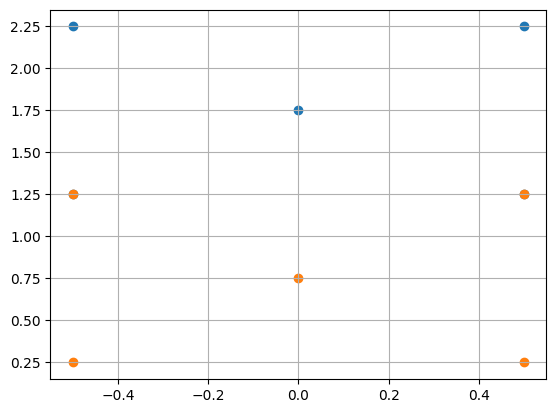

In [10]:
# plt.scatter(
#     x=s1.get_all_x(),
#     y=s1.get_all_y()   
# )
# plt.scatter(
#     x=s2.get_all_x(),
#     y=s2.get_all_y()   
# )
# plt.grid()

s1.collision(s2)

plt.scatter(
    x=s1.get_all_x(),
    y=s1.get_all_y()   
)
plt.scatter(
    x=s2.get_all_x(),
    y=s2.get_all_y()   
)
plt.grid()